In [12]:
!pip install pyldavis

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Created wheel for pyldavis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136904 sha256=c873af0245a73572d59384e14c8fca61d129a8e61786f687e255ff86cacdd1e4
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\57\a4\86\d10c6c2e0bf149fbc0afb0aa5a6528ac35b30a133a0270c477
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2959 sha256=b44f31891c09c61f1955a61b5f8b6d92d67a3097c4ffcd8e2be49608c3835903
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\f8\e0\3d\9d0c2020c44a519b9f02ab4fa6d2a4a996c98d79ab2f569fa1
Successful

In [80]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# #spacy
import spacy
import nltk
from nltk import FreqDist
nltk.download('stopwords')

#vis
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis


#warnings
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [140]:
# importing the dataset
data=pd.read_csv(r"E:\datasets\NLP datasets\Reviews.csv")

In [141]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [142]:
data.shape

(568454, 10)

In [143]:
df=data.iloc[:10000]

In [144]:
df.shape

(10000, 10)

In [145]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [146]:
df=df['Text']

In [147]:
df.head()

0    I have bought several of the Vitality canned d...
1    Product arrived labeled as Jumbo Salted Peanut...
2    This is a confection that has been around a fe...
3    If you are looking for the secret ingredient i...
4    Great taffy at a great price.  There was a wid...
Name: Text, dtype: object

In [148]:
print(df[0])

I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.


In [149]:
def freq_word(x,terms=30):
    all_words=''.join([word for word in x])
    all_words=all_words.split()
    
    fdist=FreqDist(all_words)
    words_df=pd.DataFrame({'word':list(fdist.keys()),'count':list(fdist.values())})
    
    #displaying top 20 frequent words
    d=words_df.nlargest(columns='count',n=20)
    plt.figure(figsize=(15,5))
    ax=sns.barplot(data=d,x='word',y='count')
    ax.set(ylabel = 'Count')
    plt.show()
    

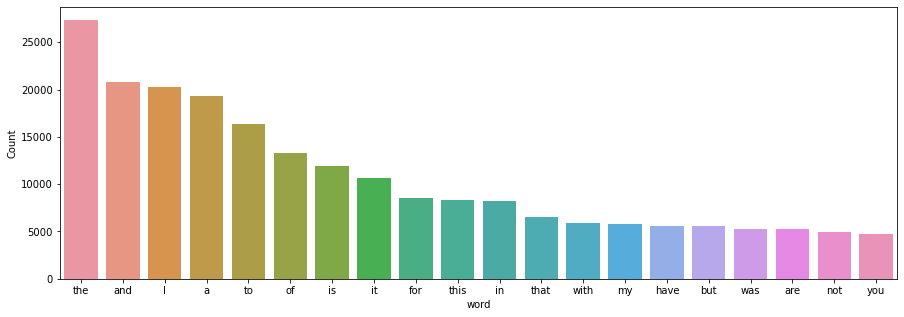

In [150]:
freq_word(df)

In [151]:
# remove unwanted characters, numbers and symbols
df = df.str.replace("[^a-zA-Z#]", " ")

In [152]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [153]:
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [154]:
# function to remove stopwords
def remove_stopwords(rev):
    rev_new = " ".join([i for i in rev if i not in stop_words])
    return rev_new

In [155]:
# remove short words (length < 3)
df= df.apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

# remove stopwords from the text
reviews = [remove_stopwords(r.split()) for r in df]

# make entire text lowercase
reviews = [r.lower() for r in reviews]

In [156]:
reviews[0]

'bought several vitality canned dog food products found good quality the product looks like stew processed meat smells better labrador finicky appreciates product better'

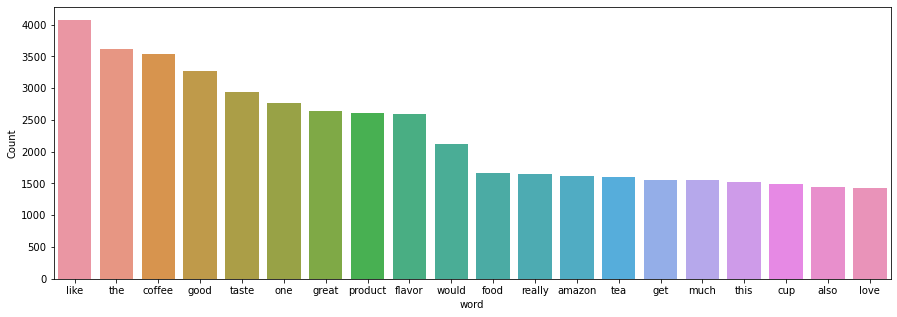

In [157]:

freq_word(reviews)

In [158]:
import spacy

nlp = spacy.load("en_core_web_sm",disable=['parser','ner'])


In [159]:

def lemmatization(texts, tags=['NOUN', 'ADJ','VERB','ADJ']):
    output = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        output.append([token.lemma_ for token in doc if token.pos_ in tags])
    return output
     

In [160]:

tokenized_reviews = pd.Series(reviews).apply(lambda x: x.split())
print(reviews[1])
print('-----------------------------------------------------------------------------')
print(tokenized_reviews[1])

product arrived labeled jumbo salted peanuts peanuts actually small sized unsalted not sure error vendor intended represent product jumbo
-----------------------------------------------------------------------------
['product', 'arrived', 'labeled', 'jumbo', 'salted', 'peanuts', 'peanuts', 'actually', 'small', 'sized', 'unsalted', 'not', 'sure', 'error', 'vendor', 'intended', 'represent', 'product', 'jumbo']


In [161]:
reviews_2 = lemmatization(tokenized_reviews)
print(reviews_2[1])

['product', 'arrive', 'label', 'jumbo', 'salt', 'peanut', 'peanut', 'small', 'sized', 'unsalted', 'sure', 'error', 'vendor', 'intend', 'represent', 'product', 'jumbo']


In [162]:
print(reviews_2[1])
len(reviews_2[1])

['product', 'arrive', 'label', 'jumbo', 'salt', 'peanut', 'peanut', 'small', 'sized', 'unsalted', 'sure', 'error', 'vendor', 'intend', 'represent', 'product', 'jumbo']


17

In [163]:
set(tokenized_reviews[1]) - set(reviews_2[1])

{'actually', 'arrived', 'intended', 'labeled', 'not', 'peanuts', 'salted'}

In [164]:
reviews_3 = []
for i in range(len(reviews_2)):
    reviews_3.append(' '.join(reviews_2[i]))
    
df['reviews'] = reviews_3

In [168]:
df['reviews'][1]

'product arrive label jumbo salt peanut peanut small sized unsalted sure error vendor intend represent product jumbo'

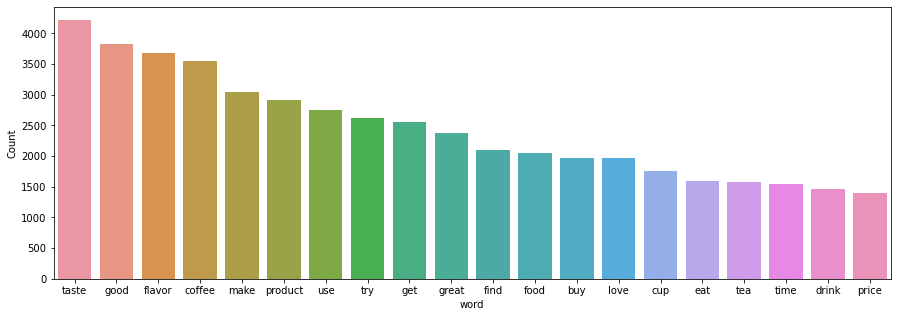

In [169]:
freq_word(df['reviews'])

In [170]:
# Create the term dictionary of our corpus, where every unique term is assigned an index
dictionary = corpora.Dictionary(reviews_2)

In [172]:
data=pd.DataFrame(dictionary)

In [184]:
data.shape

(11570, 1)

In [173]:
data.head()

,0
0,0
1,1
2,2
3,3
4,4


In [174]:
# Convert list of reviews (reviews_2) into a Document Term Matrix using the dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(rev) for rev in reviews_2]

In [175]:
# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

In [176]:
# Build LDA model
lda_model = LDA(corpus=doc_term_matrix,
                id2word=dictionary,
                num_topics=7, 
                random_state=100,
                chunksize=1000,
                passes=50)

In [177]:

lda_model.print_topics()
     

[(0,
  '0.028*"use" + 0.013*"make" + 0.011*"sauce" + 0.010*"get" + 0.009*"work" + 0.007*"open" + 0.007*"soup" + 0.007*"bag" + 0.007*"put" + 0.007*"chicken"'),
 (1,
  '0.062*"food" + 0.034*"dog" + 0.024*"cat" + 0.017*"love" + 0.014*"eat" + 0.011*"get" + 0.011*"baby" + 0.011*"organic" + 0.010*"product" + 0.010*"old"'),
 (2,
  '0.029*"tea" + 0.027*"make" + 0.023*"use" + 0.020*"taste" + 0.019*"mix" + 0.017*"product" + 0.013*"try" + 0.012*"water" + 0.012*"milk" + 0.011*"good"'),
 (3,
  '0.083*"coffee" + 0.040*"cup" + 0.031*"flavor" + 0.023*"taste" + 0.020*"good" + 0.017*"try" + 0.012*"strong" + 0.012*"chocolate" + 0.011*"roast" + 0.010*"hot"'),
 (4,
  '0.026*"product" + 0.023*"order" + 0.021*"amazon" + 0.019*"buy" + 0.018*"good" + 0.018*"price" + 0.016*"flavor" + 0.016*"chip" + 0.015*"store" + 0.014*"find"'),
 (5,
  '0.030*"taste" + 0.026*"flavor" + 0.024*"drink" + 0.018*"juice" + 0.016*"sugar" + 0.014*"soda" + 0.014*"calorie" + 0.013*"sweet" + 0.012*"good" + 0.011*"natural"'),
 (6,
  '0.02

In [181]:

# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, doc_term_matrix, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.003895 -0.160744       1        1  18.632003
2     -0.064474  0.056664       2        1  18.048067
3     -0.104872 -0.073205       3        1  16.102147
5     -0.201020  0.036719       4        1  13.071440
6      0.057282  0.013373       5        1  12.719592
0      0.103838  0.230046       6        1  11.330099
1      0.213140 -0.102854       7        1  10.096652, topic_info=       Term         Freq        Total Category  logprob  loglift
322  coffee  3974.000000  3974.000000  Default  30.0000  30.0000
5      food  1947.000000  1947.000000  Default  29.0000  29.0000
417     cup  1898.000000  1898.000000  Default  28.0000  28.0000
781     tea  1576.000000  1576.000000  Default  27.0000  27.0000
3       dog  1011.000000  1011.000000  Default  26.0000  26.0000
..      ...          ...          ...      ...      ...      ...
195     try   224.959355  2984.500648   Topic7  -4.8944  -0.2923
218    time   182.879809  1607.883018   Topic7  -5.1015   0.1191
4      find   182.505086  2177.574846   Topic7  -5.1035  -0.1862
1       buy   151.753875  2483.901362   Topic7  -5.2880  -0.5024
7      look   138.019667  1015.024588   Topic7  -5.3829   0.2977

[474 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
2449      2  0.050104   acid
2449      4  0.943617   acid
345       2  0.438178    add
345       3  0.049621    add
345       4  0.343142    add
...     ...       ...    ...
196       3  0.059214   year
196       5  0.232301   year
196       6  0.067185   year
196       7  0.277850   year
5300      3  0.989739  yuban

[807 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 3, 4, 6, 7, 1, 2])

In [182]:
# Print the Keyword in the 10 topics
lda_model.print_topics()

[(0,
  '0.028*"use" + 0.013*"make" + 0.011*"sauce" + 0.010*"get" + 0.009*"work" + 0.007*"open" + 0.007*"soup" + 0.007*"bag" + 0.007*"put" + 0.007*"chicken"'),
 (1,
  '0.062*"food" + 0.034*"dog" + 0.024*"cat" + 0.017*"love" + 0.014*"eat" + 0.011*"get" + 0.011*"baby" + 0.011*"organic" + 0.010*"product" + 0.010*"old"'),
 (2,
  '0.029*"tea" + 0.027*"make" + 0.023*"use" + 0.020*"taste" + 0.019*"mix" + 0.017*"product" + 0.013*"try" + 0.012*"water" + 0.012*"milk" + 0.011*"good"'),
 (3,
  '0.083*"coffee" + 0.040*"cup" + 0.031*"flavor" + 0.023*"taste" + 0.020*"good" + 0.017*"try" + 0.012*"strong" + 0.012*"chocolate" + 0.011*"roast" + 0.010*"hot"'),
 (4,
  '0.026*"product" + 0.023*"order" + 0.021*"amazon" + 0.019*"buy" + 0.018*"good" + 0.018*"price" + 0.016*"flavor" + 0.016*"chip" + 0.015*"store" + 0.014*"find"'),
 (5,
  '0.030*"taste" + 0.026*"flavor" + 0.024*"drink" + 0.018*"juice" + 0.016*"sugar" + 0.014*"soda" + 0.014*"calorie" + 0.013*"sweet" + 0.012*"good" + 0.011*"natural"'),
 (6,
  '0.02

In [185]:
lda_model.save('topic_modelling.model')